In [ ]:
! pip install scikit-learn matplotlib tensorflow

Accuracy WITHOUT PCA: 0.9722
Accuracy WITH EXACT PCA: 0.5167
Exact PCA computation time: 0.0250 seconds
Accuracy WITH APPROXIMATE PCA: 0.5167
Approximate PCA computation time: 0.1316 seconds
Accuracy difference (Exact PCA - Approximate PCA): 0.0000
Accuracy difference (No PCA - Approximate PCA): 0.4556


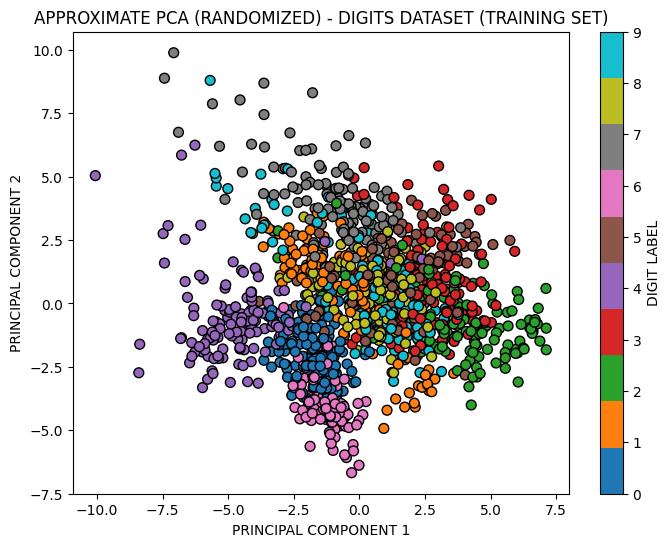

In [1]:
# IMPORT LIBRARIES FOR DATA MANIPULATION, VISUALIZATION, AND MODELING
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# LOAD DIGITS DATASET (8x8 PIXEL IMAGES OF HANDWRITTEN DIGITS 0-9)
digits = datasets.load_digits()
X = digits.data  # FEATURES ARRAY WITH SHAPE (1797 SAMPLES, 64 FEATURES)
y = digits.target  # CORRESPONDING DIGIT LABELS FROM 0 TO 9

# SPLIT DATA INTO TRAINING AND TEST SETS (80% TRAIN, 20% TEST)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STANDARDIZE FEATURES TO HAVE ZERO MEAN AND UNIT VARIANCE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# EXACT PCA USING FULL SINGULAR VALUE DECOMPOSITION SOLVER
start_exact = time.time()
pca_exact = PCA(n_components=2, svd_solver='full')  # COMPUTE EXACT PRINCIPAL COMPONENTS
X_train_pca_exact = pca_exact.fit_transform(X_train_scaled)
X_test_pca_exact = pca_exact.transform(X_test_scaled)
end_exact = time.time()

# APPROXIMATE PCA USING RANDOMIZED SVD SOLVER FOR FASTER COMPUTATION
start_approx = time.time()
pca_approx = PCA(n_components=2, svd_solver='randomized', random_state=42)  # APPROXIMATE PCA
X_train_pca_approx = pca_approx.fit_transform(X_train_scaled)
X_test_pca_approx = pca_approx.transform(X_test_scaled)
end_approx = time.time()

# TRAIN LOGISTIC REGRESSION MODEL WITHOUT PCA (ON FULL FEATURE SET)
model_no_pca = LogisticRegression(max_iter=10000)
model_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = model_no_pca.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
print(f"Accuracy WITHOUT PCA: {accuracy_no_pca:.4f}")

# TRAIN LOGISTIC REGRESSION MODEL USING EXACT PCA FEATURES
model_exact_pca = LogisticRegression(max_iter=10000)
model_exact_pca.fit(X_train_pca_exact, y_train)
y_pred_exact_pca = model_exact_pca.predict(X_test_pca_exact)
accuracy_exact_pca = accuracy_score(y_test, y_pred_exact_pca)
print(f"Accuracy WITH EXACT PCA: {accuracy_exact_pca:.4f}")
print(f"Exact PCA computation time: {end_exact - start_exact:.4f} seconds")

# TRAIN LOGISTIC REGRESSION MODEL USING APPROXIMATE PCA FEATURES
model_approx_pca = LogisticRegression(max_iter=10000)
model_approx_pca.fit(X_train_pca_approx, y_train)
y_pred_approx_pca = model_approx_pca.predict(X_test_pca_approx)
accuracy_approx_pca = accuracy_score(y_test, y_pred_approx_pca)
print(f"Accuracy WITH APPROXIMATE PCA: {accuracy_approx_pca:.4f}")
print(f"Approximate PCA computation time: {end_approx - start_approx:.4f} seconds")

# COMPARE ACCURACY DIFFERENCES BETWEEN METHODS
print(f"Accuracy difference (Exact PCA - Approximate PCA): {accuracy_exact_pca - accuracy_approx_pca:.4f}")
print(f"Accuracy difference (No PCA - Approximate PCA): {accuracy_no_pca - accuracy_approx_pca:.4f}")

# VISUALIZE TRAINING DATA PROJECTED ONTO FIRST TWO PRINCIPAL COMPONENTS
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca_approx[:, 0], X_train_pca_approx[:, 1], c=y_train, cmap='tab10', edgecolor='k', s=50)
plt.title("APPROXIMATE PCA (RANDOMIZED) - DIGITS DATASET (TRAINING SET)")
plt.xlabel('PRINCIPAL COMPONENT 1')
plt.ylabel('PRINCIPAL COMPONENT 2')
plt.colorbar(label='DIGIT LABEL')
plt.show()